In [24]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [25]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [26]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [27]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


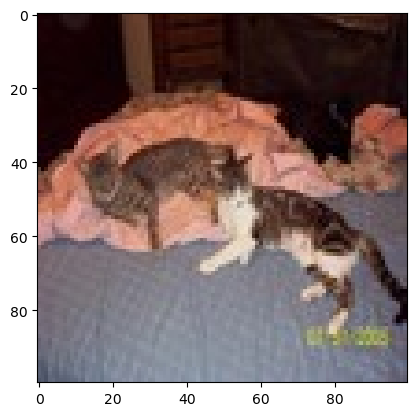

In [48]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [36]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [37]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [38]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [45]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 6s 188ms/step - loss: 0.4318 - accuracy: 0.8025
Epoch 2/10
32/32 [==============================] - 5s 158ms/step - loss: 0.3602 - accuracy: 0.8360
Epoch 3/10
32/32 [==============================] - 5s 141ms/step - loss: 0.3038 - accuracy: 0.8725
Epoch 4/10
32/32 [==============================] - 4s 136ms/step - loss: 0.2221 - accuracy: 0.9150
Epoch 5/10
32/32 [==============================] - 5s 152ms/step - loss: 0.1764 - accuracy: 0.9425
Epoch 6/10
32/32 [==============================] - 5s 140ms/step - loss: 0.1658 - accuracy: 0.9305
Epoch 7/10
32/32 [==============================] - 5s 157ms/step - loss: 0.1106 - accuracy: 0.9625
Epoch 8/10
32/32 [==============================] - 5s 161ms/step - loss: 0.0610 - accuracy: 0.9860
Epoch 9/10
32/32 [==============================] - 4s 137ms/step - loss: 0.0368 - accuracy: 0.9925
Epoch 10/10
32/32 [==============================] - 5s 141ms/step - loss: 0.0209 - accuracy: 0.9970

In [46]:
test_loss, test_acc = model.evaluate(X_train, Y_train)
print("Loss =", test_loss)
print("Accuracy =", test_acc)

63/63 [==============================] - 4s 58ms/step - loss: 0.0136 - accuracy: 0.9995
Loss = 0.013645806349813938
Accuracy = 0.9994999766349792


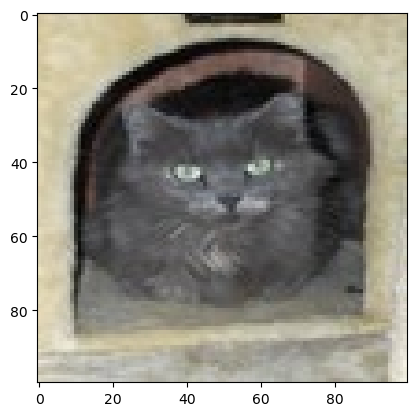

1/1 [==============================] - 0s 96ms/step
Our model says it is a : cat


In [47]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)